### **Laily Azizah (Kel 2)**

## TAKE HOME TEST - DESCRIPTIVE ANALYSIS

> ### Objective: 
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
> 
> ### Dataset: 
> - The Adult dataset, available at [Kaggle - Titanic](https://www.kaggle.com/c/titanic/data). 
> - Contains data about the passengers aboard the Titanic, including age, gender, passenger class, and whether they survived or not.

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure. 
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# load data
df = pd.read_csv('data/titanic_train.csv')

In [3]:
# show the number of rows and columns
df.shape

(891, 12)

In [4]:
# show missing values of each column of the data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Any initial observations or issues you notice (if any)
# check whether the data has duplicate values 
df.duplicated().sum()

0

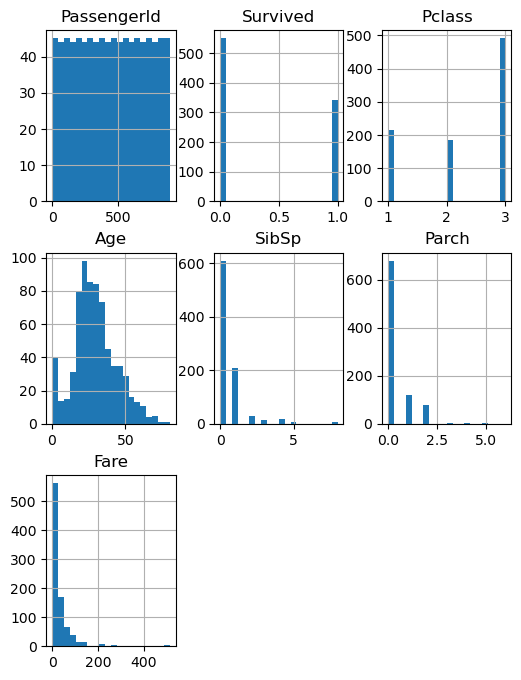

In [6]:
# plotting for numerical columns
df.hist(bins = 20, figsize = (6, 8))
plt.show()

### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

In [7]:
# show top data using .head() function
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# show data type of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# change datatype float to category
df['Pclass'] = df['Pclass'].astype('category')

In [10]:
# show datatype of each column after change
df.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [11]:
# identify missing value and show the number and percentage of missing value
round(df.isna().sum()/len(df)* 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

> #### 1). Impute Missing Value
Because the percentage of missing values is 19.87% in the age column and 0.22% in the Embarked column, I will choose to impute missing value methods for that column with mean and mode.

In [12]:
# show descriptive stats (Age)
round(df['Age'].describe(), 2)

count    714.00
mean      29.70
std       14.53
min        0.42
25%       20.12
50%       28.00
75%       38.00
max       80.00
Name: Age, dtype: float64

In [13]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
# fill each missing value in the Age column and Embarked column with mean and mode of the data
mean = df['Age'].mean()
modus = df['Embarked'].mode()[0]

df['Age'] = df['Age'].fillna(mean)
df['Embarked'] = df['Embarked'].fillna(modus)

In [15]:
# show amounts of missing value after imputing
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

> #### 2). Drop Column
The missing value of the cabin column, can't be described using another column in the dataset, and missing values of the cabin column are not related to the reason it's missing. Therefore I will drop the Cabin column from the dataset. The cabin column has more than 50% missing values, precisely 77.10% of missing values.

In [16]:
# droping entire column (Cabin)
df.drop(columns = ['Cabin'], inplace = True)

In [17]:
# show the amount of rows and columns after handling
df.shape

(891, 11)

In [18]:
# show missing values after handling
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers: 
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [19]:
# split numeric, category, and object data 
df_num = df.select_dtypes(exclude = ['object', 'category'])

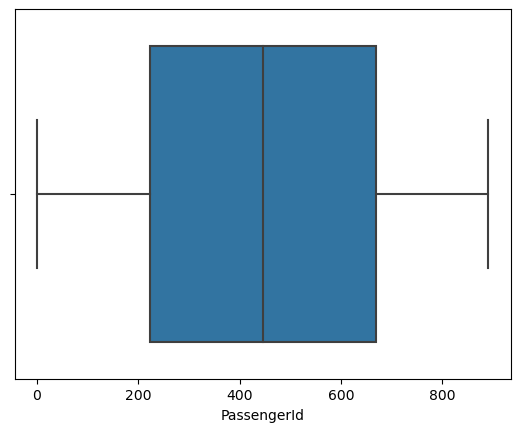

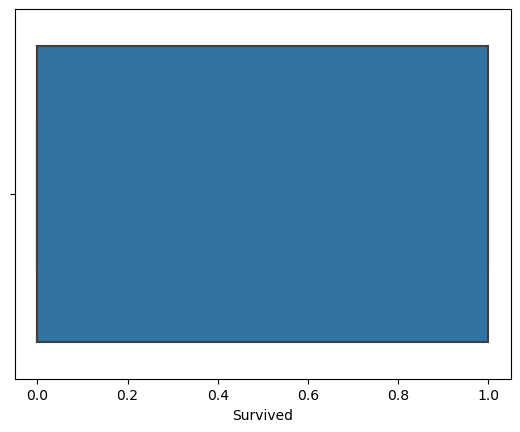

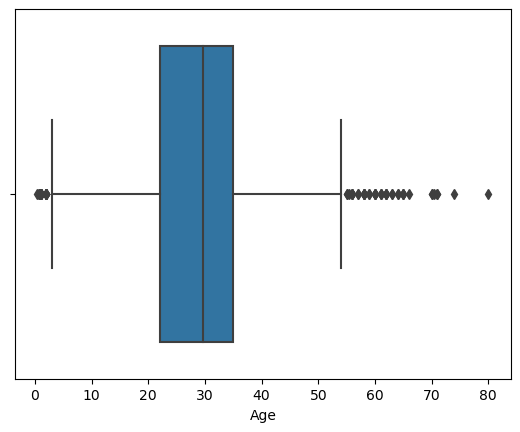

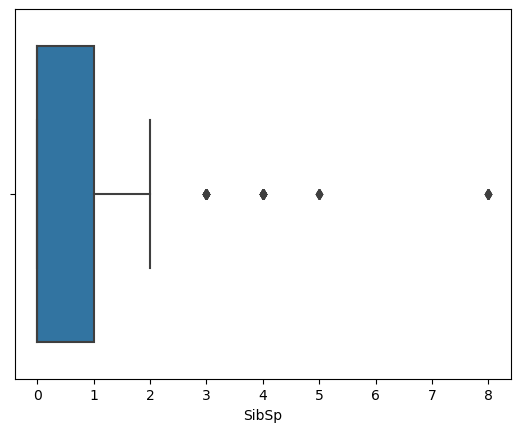

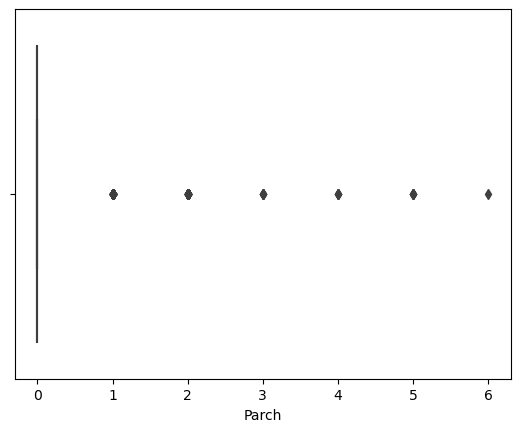

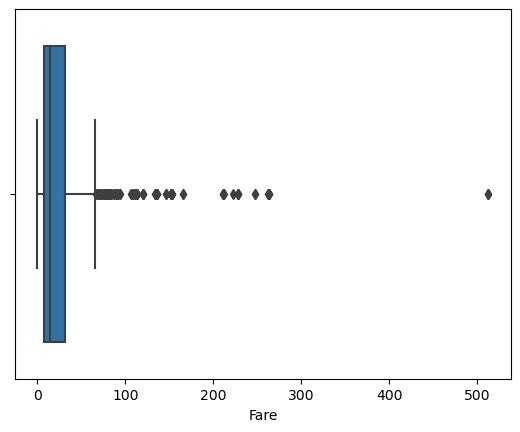

In [20]:
# show ouliers in the column using loop
for i in df_num:
    sns.boxplot(data = df_num, x = i)
    plt.show()

In [21]:
def findoutlier(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    
    # Count limit value
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    low_out = []
    upp_out = []
    
    # find upper limit and lower limit for each column using for loop
    for i in data:
        if (i > upper_limit):
            upp_out.append(i)
        if (i < lower_limit):
            low_out.append(i)
            
    return print('crossed the lower limit: ', low_out, '||  crossed the upper limit: ', upp_out)

In [22]:
findoutlier(df['Age'])

crossed the lower limit:  [2.0, 2.0, 0.83, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.92, 2.0, 1.0, 1.0, 0.75, 2.0, 2.0, 2.0, 0.75, 0.67, 1.0, 0.42, 2.0, 1.0, 0.83] ||  crossed the upper limit:  [58.0, 55.0, 66.0, 65.0, 59.0, 71.0, 70.5, 55.5, 61.0, 56.0, 58.0, 59.0, 62.0, 58.0, 63.0, 65.0, 61.0, 60.0, 64.0, 65.0, 56.0, 63.0, 58.0, 55.0, 71.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 57.0, 62.0, 74.0, 56.0]


In [23]:
# z score check 
z = np.abs(stats.zscore(df_num))

In [24]:
# dropped outlier
outlier_loc = np.where( z > 3)[0].tolist()
df_outlier = df.loc[~df.index.isin(outlier_loc)]

In [25]:
# show the number of rows and columns after dropping outlier
df_outlier.shape

(820, 11)

### 5. DESCRIPTIVE ANALYSIS
> Explore the data by doing descriptive analysis.
> 
> Descriptive Statistics: 
> - Compute and report central tendencies (mean, median, mode) for relevant columns.
> - Report dispersions (variance, standard deviation, range) for key numerical columns.
> - Analyze the distribution of key categorical variables, including counts and proportions.
>
> Visual Analysis (optional):
> - Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

In [26]:
# computing the mean for each feature
df_outlier.mean()

PassengerId    445.719512
Survived         0.390244
Age             29.792831
SibSp            0.348780
Parch            0.254878
Fare            25.836051
dtype: float64

> We can see that each feature above has mean values around _445.72_ for PassengerId, _0.39_ for Survived, _29.79_ for Age, _0.35_ for SibSp, _0.25_ for Parch, and the last one _25.84_ for Fare.

In [27]:
# computing median for each feature
df_outlier.median()

PassengerId    446.500000
Survived         0.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            13.000000
dtype: float64

> We can see that each feature above has median values for each column around _446.5_ for PassengerId, _0.0_ for Survived, _29.7_ for Age, _0.0_ for SibSp, _0.0_ for Parch, and the last one _13.0_ for Fare.

In [28]:
# computing mode for each feature
df_outlier.mode().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Abbing, Mr. Anthony",male,29.699118,0.0,0.0,1601,8.05,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN


> We can see that each feature above has mode values for each feature in the dataset that is the Survived is _0.0_, Pclass is _3.0_, Sex is _Male_, Age is _29.699118_, SibSp is _0.0_, Parch is _0.0_, Ticket is _1601_, Fare is _8.05_, and the last one is Embarked that is  _S(Southampton)_.

In [29]:
# computing the variance for each feature
df_num.var()

PassengerId    66231.000000
Survived           0.236772
Age              169.052400
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

> We can see that the variance for PassengerId has a _66231.00_ variance, Survived has _0.24_, Age has _169.05_, SibSp has _1.22_, Parch has _0.65_, and Fare has a _2469.44_ variance.

In [30]:
# computing the standard deviation for each feature
df.std()

PassengerId    257.353842
Survived         0.486592
Age             13.002015
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

> Based on the information above, we can conclude that Passenger ID has _257.35_ std, Age has _13.00_ std, SibSp has _1.10_ std, Parch has _0.81_ std, and Fare has _49.69_ std.

In [31]:
# computing the range for each feature
for i in df_num:
    try:
        print(f'{i} range {df[i].max() - df[i].min()}')
    except:
        pass

PassengerId range 890
Survived range 1
Age range 79.58
SibSp range 8
Parch range 6
Fare range 512.3292


In [32]:
df['Fare'].max() - df['Fare'].min()

512.3292

> Based on the information above, we can see how to range for each feature. For range value for each feature like PassengerId with a range of _890_, Survived with a range of _1_, Age with a range of _79.58_, SibSp with a range of _8_, Parch with a range of _6_, and the last one is Fare with a range of _512.3292_.

### 6. SUMMARY
> Summarize the analysis process: 
> - Highlight key findings from the descriptive analysis.
> - Highlight any challenges encountered during the analysis and how they were addressed. (optional)
> - Provide potential insights or observations based on the analysis. (optional)

> **Highlight key findings from the descriptive analysis.**
> - In the descriptive analysis, I calculated the mean, median, and mode values for each column in the dataset after handling the outlier, where those values can be used for reference doing another analysis. 
> - I also calculated the variance, standard deviation, and range for each numerical column in the dataset to provide a basis for further statistical analysis.

> **Highlight any challenges encountered during the analysis and how they were addressed. (optional)**
> - Determine the correct data type for each column in the dataset. To finish the problem, I decided to only change the data type in the Pclass column as category.
> - The challenges he faced when dropping outliers, where my ability to do this was still poorly trained. Finally, to overcome the problem, I used z-score methods to finish it. 